In [4]:
import pandas as pd
data = pd.read_csv('sales_data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.rename(columns={'timestamp':'ds', 'sales':'y'})

from prophet import Prophet
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi2ntatoz/elvpafrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi2ntatoz/i8k8oydl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87724', 'data', 'file=/tmp/tmpi2ntatoz/elvpafrf.json', 'init=/tmp/tmpi2ntatoz/i8k8oydl.json', 'output', 'file=/tmp/tmpi2ntatoz/prophet_model95pdmh3o/prophet_model-20240111210943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future_dates = model.make_future_dataframe(periods=365*2, freq='D')

In [6]:
forecast = model.predict(future_dates)

<Figure size 640x480 with 0 Axes>

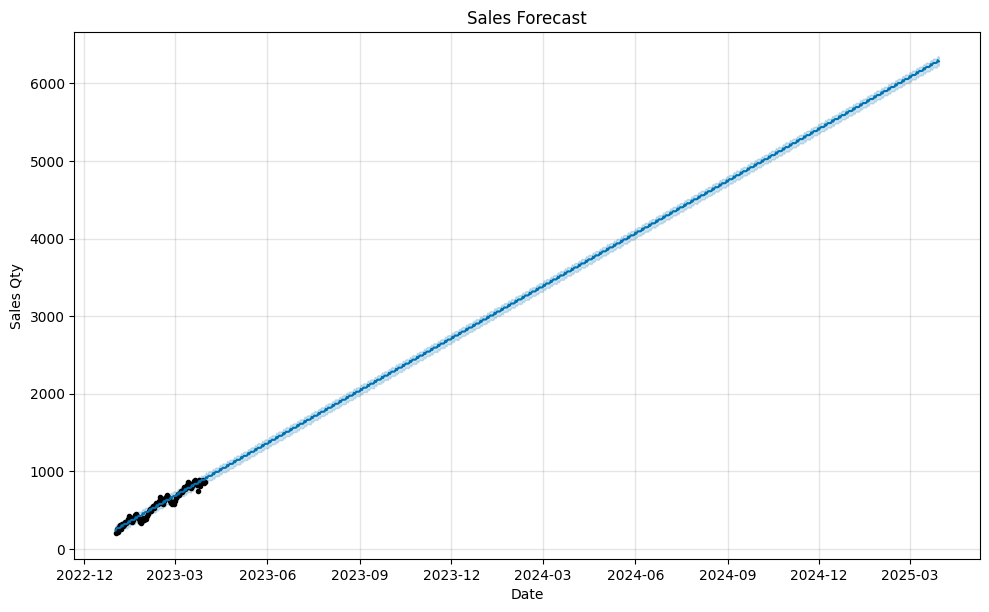

In [7]:
import matplotlib.pyplot as plt
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='Sales Qty')
plt.title('Sales Forecast')
plt.show()

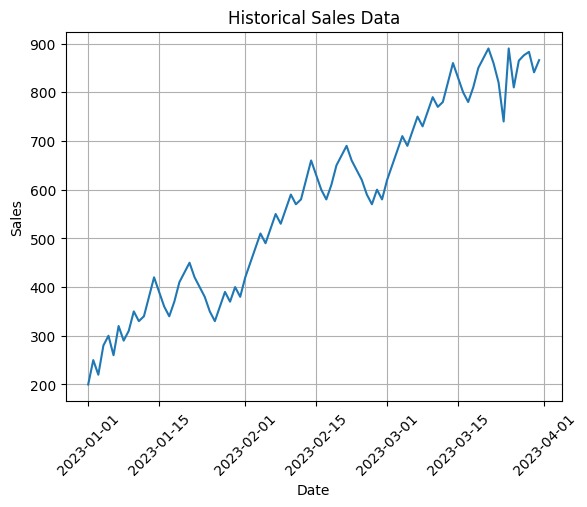

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sales_data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
plt.plot(data['timestamp'], data['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical Sales Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()